In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pyana

In [2]:
from IPython.display import display, HTML
import matplotlib
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/milic/codes/Tracking_features/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)

In [4]:
stokes = pyana.fzread("/home/milic/data/scratch/loc_dyn_32_32_16_0_tumag.f0")["data"]

In [5]:
stokes.shape

(768, 768, 4, 622)

In [6]:
mean = np.mean(stokes, axis=(0,1))

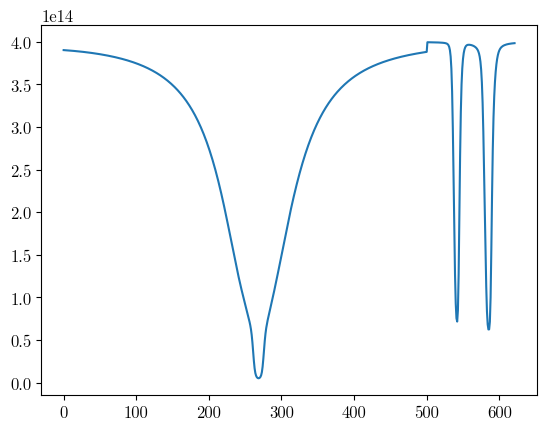

In [7]:
plt.plot(mean[0])

In [8]:
# Here we pick out the wavelengths:

from scipy.signal import find_peaks

In [9]:
line_cores = find_peaks(-mean[0])
print (line_cores)

(array([268, 542, 585]), {})


In [10]:
line_cores[0][0]

268

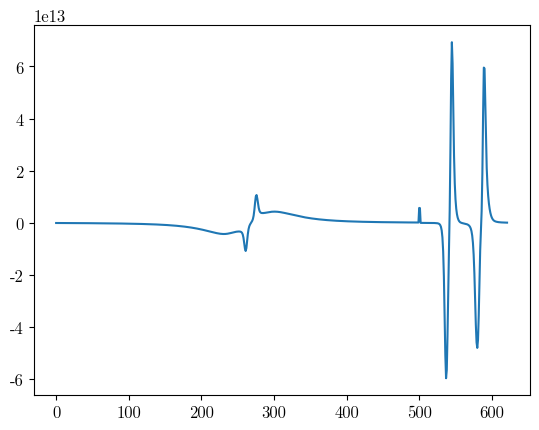

In [11]:
plt.plot(np.gradient(mean[0]))

In [12]:
V_peaks = find_peaks(np.abs(np.gradient(mean[0])))

In [13]:
V_peaks

(array([231, 261, 276, 301, 500, 537, 545, 580, 589]), {})

In [14]:
stokes /= mean[0,0]

## $V = -4.67 \times 10^{-11} \frac{dI}{d\lambda} \lambda_0^2 g B$

In [15]:
x = np.arange(stokes.shape[0]) * 32.0 / 1E3 # Mm
y = np.arange(stokes.shape[1]) * 32.0 / 1E3 # Mm

In [16]:
mean_Mg = mean[0,:501]
mean_Fe = mean[0,501:]
mean_Mg /= mean_Mg[0]
mean_Fe /= mean_Fe[0]

In [17]:
ll_Mg = (np.arange(501) - 250) * 0.001
ll_Fe = (np.arange(121) - 60) * 0.001

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


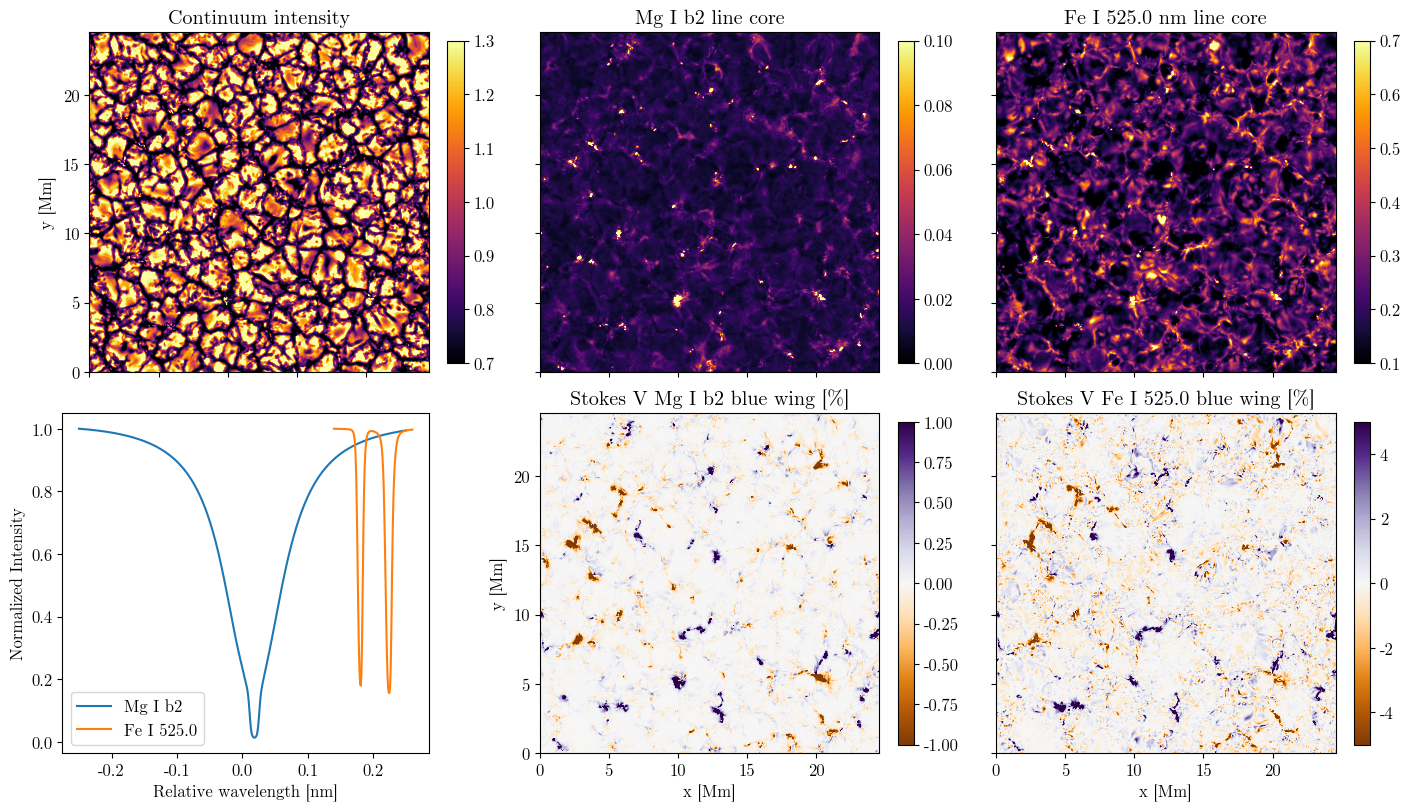

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[14,8], layout='constrained')

#rect = patches.Rectangle((2, 0.5), 2, 2, linewidth=2, edgecolor='r', facecolor='none')


#divnorm = colors.TwoSlopeNorm(vmin=-1000, vcenter=0, vmax=200)

#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#fig.subplots_adjust(wspace=0.15, hspace=0.1)
plot_no = 0

for ax in axes.flat:
    
    if (plot_no==0):
        im = ax.imshow(np.mean(stokes[:,:,0,0:1],axis=2).T, origin='lower', cmap='inferno', vmin=0.7,vmax=1.3, extent=[x[0],x[-1],y[0],y[-1]], aspect='equal')
        #ax.text(0.5,7.0,"b", color='white', fontsize=20)
        #ax.text(2200,2400,"t="+str(t*10)+"s", color='black', fontsize=20)
        #ax.set_xlim([500,3500])
        #ax.set_ylim([0,3000])
        ax.set_xticklabels([])
        
        ax.set_ylabel("y [Mm]")
        ax.set_title("Continuum intensity")
        fig.colorbar(im, shrink=0.95)
    
    if (plot_no==1):
        im = ax.imshow(np.mean(stokes[:,:,0,line_cores[0][0]-2:line_cores[0][0]+3],axis=2).T, origin='lower', cmap='inferno', vmin=0, vmax=0.1, extent=[x[0],x[-1],y[0],y[-1]], aspect='equal')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_title("Mg I b2 line core")
        fig.colorbar(im, shrink=0.95)
    
    if (plot_no ==2):
        im = ax.imshow(np.mean(stokes[:,:,0,line_cores[0][1]-2:line_cores[0][1]+3],axis=2).T, origin='lower', cmap='inferno', vmin=0.1, vmax=0.7, extent=[x[0],x[-1],y[0],y[-1]], aspect='equal')
        ax.set_title("Fe I 525.0 nm line core")
        fig.colorbar(im, shrink=0.95)
        #ax.text(0.5,7.0,"f", color='black', fontsize=20)
        #ax.quiver(xa[::2], ya[::2], -Bxar[t].T, -Byar[t].T, scale=15000, headwidth=0)
        #ax.set_xlabel("x [km]")
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    
    if (plot_no==3):
        #im = ax.imshow(np.mean(stokes[:,:,1,140:145],axis=2).T, origin='lower', cmap='PuOr', vmin=-0.1,vmax=0.1, extent=[xa[0],xa[-1],ya[0],ya[-1]], aspect='equal')
        #ax.set_yticklabels([])
        #ax.set_xticklabels([])
        #ax.set_title("")
        #fig.colorbar(im, shrink=0.7)
        #ax.text(0.5,7.0,"c", color='black', fontsize=20)
        #ax.set_xlabel("x [arcsec]")
        #ax.set_ylabel("y [arcsec]")
        im = ax.plot(ll_Mg, mean_Mg, label = 'Mg I b2')
        ax.plot(ll_Fe+0.2, mean_Fe, label = 'Fe I 525.0')
        ax.set_xlabel("Relative wavelength [nm]")
        ax.set_ylabel("Normalized Intensity")
        ax.legend()
        #ax.compress)
    
    
    if (plot_no==4):
        im = ax.imshow(np.mean(stokes[:,:,3,V_peaks[0][1]-2:V_peaks[0][1]+3],axis=2).T*100.0, origin='lower', cmap='PuOr', vmin=-1, vmax=1, extent=[x[0],x[-1],y[0],y[-1]], aspect='equal')
        #ax.set_yticklabels([])
        #ax.set_xticklabels([])
        ax.set_ylabel("y [Mm]")
        ax.set_xlabel("x [Mm]")
        ax.set_title("Stokes V Mg I b2 blue wing [%]")
        #ax.text(0.5,7.0,"e", color='black', fontsize=20)
        #ax.add_patch(rect)
        #ax.set_ylabel("y [km]")
        fig.colorbar(im, shrink=0.95)
        
    
        
    if (plot_no ==5):
        im = ax.imshow(np.mean(stokes[:,:,3,V_peaks[0][5]-2:V_peaks[0][5]+3],axis=2).T*100.0, origin='lower', cmap='PuOr', vmin=-5, vmax=5, extent=[x[0],x[-1],y[0],y[-1]], aspect='equal')
        ax.set_title("")
        ax.text(0.5,7.0,"g", color='white', fontsize=20)
        ax.set_title("Stokes V Fe I 525.0 blue wing [%]")
        fig.colorbar(im, shrink=0.95)
        #ax.quiver(xa[::2], ya[::2], -Bxar[t].T, -Byar[t].T, scale=15000, headwidth=0)
        ax.set_xlabel("x [Mm]")
        ax.set_yticklabels([])
        
        
    plot_no+=1
    
#fig.subplots_adjust(right=0.9)
#cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
#fig.colorbar(im, cax=cbar_ax)
plt.savefig("TuMAG_synth.eps",bbox_inches='tight')
plt.savefig("TuMAG_synth.png",bbox_inches='tight')